In [1]:
!pip install scikit-plot

In [2]:

# Importing Libraries
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Reading the dataset into the dataframe
df = pd.read_csv("AIDA-PHQ-Updated.csv")

# Data preprocessing
ordinal_mappings = {
    'Not Applicable': 0,
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly agree': 5
}

ordinal_columns = [
    'PoorAcademicPerformanceSelfPerception', 'AcademicCriticismSelfPerception',
    'UnsatisfiedAcademicWorkloadSelfPerception', 'NonInterestSubjectOpinion',
    'UnhappySubjectOpinion', 'NonInterestInstitutionOpinion',
    'UnhappyInstitutionOpinion', 'ParentalStrictness', 'ParentalAcademicPressure',
    'ParentalMarriagePressure', 'ParentalCareerPressure',
    'ParentalStudyAbroadPressure', 'ParentalUnderstanding', 'SiblingBonding',
    'ParentalRelationshipStability', 'PeerRelationship', 'TeacherSupport',
    'PartnerRelationshipImpact', 'PhysicalViolenceExperience', 'SexualViolenceExperience',
    'VerbalViolenceExperience', 'EmotionalViolenceExperience'
]

for col in ordinal_columns:
    df[col] = df[col].map(ordinal_mappings)

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

for col in ordinal_columns:
    if df[col].isna().any():
        df[col].fillna(df[col].median(), inplace=True)

# Feature Engineering
X = df[['Age', 'Gender', 'little interest', 'feeling down', 'Sleeping issue',
        'feeling tired', 'poor appetite', 'feeling bad', 'trouble concertrating',
        'slowness', 'self harm', 'PhysicalViolenceExperience', 'SexualViolenceExperience',
        'VerbalViolenceExperience', 'EmotionalViolenceExperience']]
y = df['DepressionLevel']

# Train Test Split
initial_random_state = 2024
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=initial_random_state)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers with best hyperparameters
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=1, metric='euclidean'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=2, min_samples_leaf=1),
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='log2'),
    'Logistic Regression': LogisticRegression(C=100.0, solver='newton-cg'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, learning_rate=1, algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=2, min_samples_split=10, min_samples_leaf=1, loss='log_loss')
}

# Initialize random state
initial_random_state = 2024

# Store evaluation metrics
evaluation_metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in classifiers.keys()}

# Varying seed value for random_state
for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Evaluate each classifier
    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Predict using the trained classifier
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Store evaluation metrics
        evaluation_metrics[classifier_name]['accuracy'].append(accuracy)
        evaluation_metrics[classifier_name]['precision'].append(precision)
        evaluation_metrics[classifier_name]['recall'].append(recall)
        evaluation_metrics[classifier_name]['f1'].append(f1)

# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()


-------------KNN:-------------
Accuracy: 0.7712 ± 0.0377
Precision: 0.7892 ± 0.0386
Recall: 0.7614 ± 0.0361
F1 Score: 0.7702 ± 0.0354

-------------Decision Tree:-------------
Accuracy: 0.7135 ± 0.0300
Precision: 0.7214 ± 0.0506
Recall: 0.6725 ± 0.0589
F1 Score: 0.6874 ± 0.0547

-------------Random Forest:-------------
Accuracy: 0.8231 ± 0.0368
Precision: 0.8499 ± 0.0194
Recall: 0.7888 ± 0.0375
F1 Score: 0.8103 ± 0.0300

-------------Logistic Regression:-------------
Accuracy: 0.9635 ± 0.0072
Precision: 0.9356 ± 0.0224
Recall: 0.9400 ± 0.0149
F1 Score: 0.9360 ± 0.0176

-------------Naive Bayes:-------------
Accuracy: 0.7500 ± 0.0310
Precision: 0.7806 ± 0.0230
Recall: 0.7330 ± 0.0265
F1 Score: 0.7468 ± 0.0216

-------------SVM:-------------
Accuracy: 0.9712 ± 0.0122
Precision: 0.9436 ± 0.0283
Recall: 0.9434 ± 0.0179
F1 Score: 0.9407 ± 0.0221

-------------AdaBoost:-------------
Accuracy: 0.5404 ± 0.0281
Precision: 0.3163 ± 0.0225
Recall: 0.4499 ± 0.0349
F1 Score: 0.3677 ± 0.0237

------

In [3]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('svm', SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='log2')),
    ('gbm', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=2, min_samples_split=10, min_samples_leaf=1, loss='log_loss'))
]

# Define the meta-model
meta_model = LogisticRegression(C=100.0, solver='lbfgs')

# Store evaluation metrics, use 'evaluation_metrics' instead of 'evaluation'
evaluation_metrics['Stacking'] = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the dataset into training and testing sets

for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create the stacking classifier
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

    # Train the stacking classifier
    stacking_clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = stacking_clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')


    # Store evaluation metrics, use 'Stacking' as the classifier name since it's a new model
    evaluation_metrics['Stacking']['accuracy'].append(accuracy)
    evaluation_metrics['Stacking']['precision'].append(precision)
    evaluation_metrics['Stacking']['recall'].append(recall)
    evaluation_metrics['Stacking']['f1'].append(f1)




# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items(): # Use 'evaluation_metrics'
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

-------------KNN:-------------
Accuracy: 0.7712 ± 0.0377
Precision: 0.7892 ± 0.0386
Recall: 0.7614 ± 0.0361
F1 Score: 0.7702 ± 0.0354

-------------Decision Tree:-------------
Accuracy: 0.7135 ± 0.0300
Precision: 0.7214 ± 0.0506
Recall: 0.6725 ± 0.0589
F1 Score: 0.6874 ± 0.0547

-------------Random Forest:-------------
Accuracy: 0.8231 ± 0.0368
Precision: 0.8499 ± 0.0194
Recall: 0.7888 ± 0.0375
F1 Score: 0.8103 ± 0.0300

-------------Logistic Regression:-------------
Accuracy: 0.9635 ± 0.0072
Precision: 0.9356 ± 0.0224
Recall: 0.9400 ± 0.0149
F1 Score: 0.9360 ± 0.0176

-------------Naive Bayes:-------------
Accuracy: 0.7500 ± 0.0310
Precision: 0.7806 ± 0.0230
Recall: 0.7330 ± 0.0265
F1 Score: 0.7468 ± 0.0216

-------------SVM:-------------
Accuracy: 0.9712 ± 0.0122
Precision: 0.9436 ± 0.0283
Recall: 0.9434 ± 0.0179
F1 Score: 0.9407 ± 0.0221

-------------AdaBoost:-------------
Accuracy: 0.5404 ± 0.0281
Precision: 0.3163 ± 0.0225
Recall: 0.4499 ± 0.0349
F1 Score: 0.3677 ± 0.0237

------

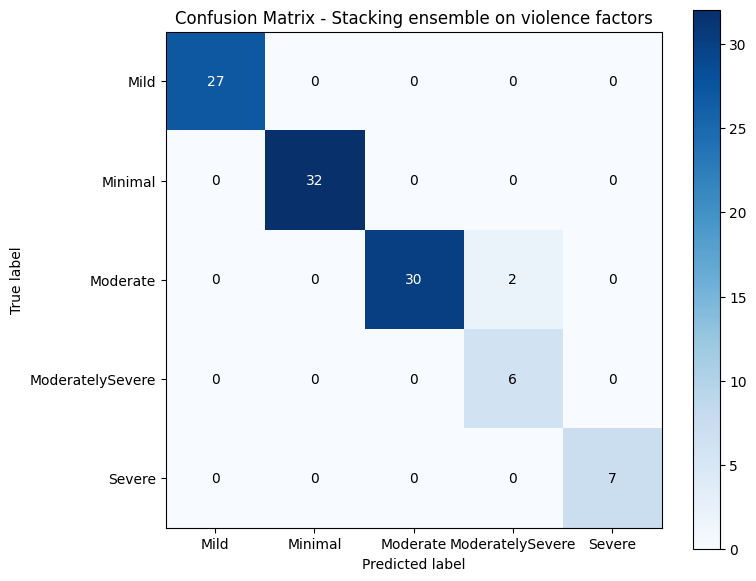

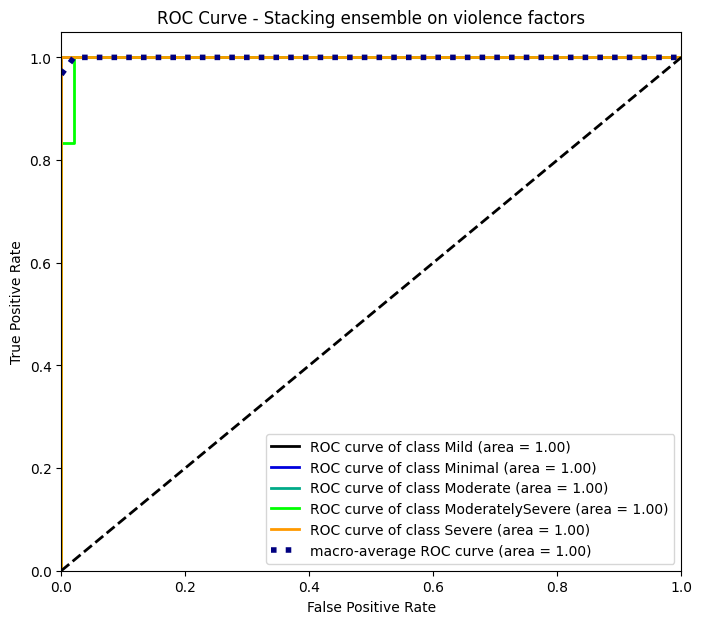

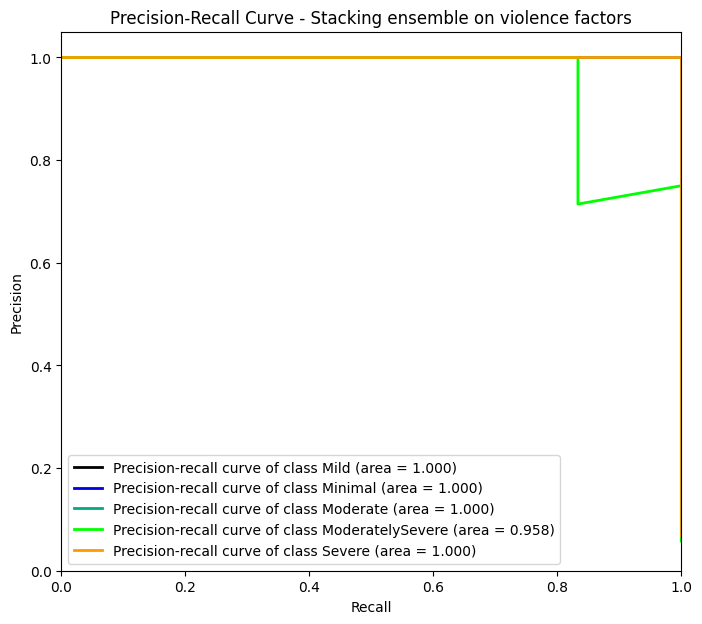

In [4]:
    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,7), title=f"Confusion Matrix - {name} ensemble on violence factors");

    # Plot ROC curve with classifier name
    y_probas = stacking_clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(8,7), plot_micro=False, plot_macro=True, title=f"ROC Curve - {name} ensemble on violence factors");

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(8,7), plot_micro=False, title=f"Precision-Recall Curve - {name} ensemble on violence factors");

In [6]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Define the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=2, min_samples_split=10, min_samples_leaf=1, loss='log_loss')

# Store evaluation metrics
evaluation_metrics['XGBoost'] = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the dataset into training and testing sets
for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Encode the target variable to numerical labels
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Train the XGBoost classifier
    xgb_clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = xgb_clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store evaluation metrics
    evaluation_metrics['XGBoost']['accuracy'].append(accuracy)
    evaluation_metrics['XGBoost']['precision'].append(precision)
    evaluation_metrics['XGBoost']['recall'].append(recall)
    evaluation_metrics['XGBoost']['f1'].append(f1)

# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

-------------KNN:-------------
Accuracy: 0.7712 ± 0.0377
Precision: 0.7892 ± 0.0386
Recall: 0.7614 ± 0.0361
F1 Score: 0.7702 ± 0.0354

-------------Decision Tree:-------------
Accuracy: 0.7135 ± 0.0300
Precision: 0.7214 ± 0.0506
Recall: 0.6725 ± 0.0589
F1 Score: 0.6874 ± 0.0547

-------------Random Forest:-------------
Accuracy: 0.8231 ± 0.0368
Precision: 0.8499 ± 0.0194
Recall: 0.7888 ± 0.0375
F1 Score: 0.8103 ± 0.0300

-------------Logistic Regression:-------------
Accuracy: 0.9635 ± 0.0072
Precision: 0.9356 ± 0.0224
Recall: 0.9400 ± 0.0149
F1 Score: 0.9360 ± 0.0176

-------------Naive Bayes:-------------
Accuracy: 0.7500 ± 0.0310
Precision: 0.7806 ± 0.0230
Recall: 0.7330 ± 0.0265
F1 Score: 0.7468 ± 0.0216

-------------SVM:-------------
Accuracy: 0.9712 ± 0.0122
Precision: 0.9436 ± 0.0283
Recall: 0.9434 ± 0.0179
F1 Score: 0.9407 ± 0.0221

-------------AdaBoost:-------------
Accuracy: 0.5404 ± 0.0281
Precision: 0.3163 ± 0.0225
Recall: 0.4499 ± 0.0349
F1 Score: 0.3677 ± 0.0237

------